In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [123]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [124]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [125]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [127]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [128]:
data.shape

(13320, 9)

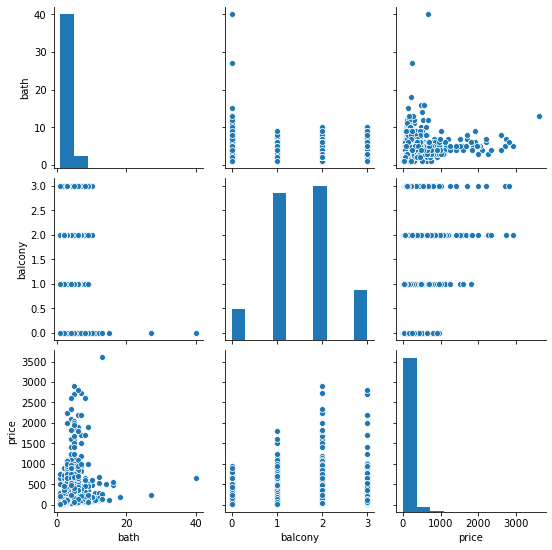

In [129]:
sns.pairplot(data)

In [130]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [131]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
14-Jul               1
15-Aug               1
16-Jan               1
16-Jul               1
Name: availability, Length: 81, dtype: int64

In [132]:
data['location'].value_counts()

Whitefield                           540
Sarjapur  Road                       399
Electronic City                      302
Kanakpura Road                       273
Thanisandra                          234
                                    ... 
Ananthapura, T C palaya Main Road      1
Banagirinagar                          1
Kanakapura main  Road                  1
Beml layout, Rajarajeshwari nagar      1
Annasandrapalya                        1
Name: location, Length: 1305, dtype: int64

In [133]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
12 Bedroom       1
16 BHK           1
27 BHK           1
43 Bedroom       1
14 BHK           1
19 BHK           1
18 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [134]:
data['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Arensh      1
JaghtDe     1
KuisePa     1
Caiseha     1
Pa II E     1
Name: society, Length: 2688, dtype: int64

In [135]:
data['society'].isnull().value_counts()

False    7818
True     5502
Name: society, dtype: int64

In [136]:
data.drop('society',axis=1,inplace=True)

In [137]:
data.drop('availability',axis=1,inplace=True)

In [138]:
data

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [139]:
data['size'].isnull().value_counts()

False    13304
True        16
Name: size, dtype: int64

In [140]:
data['size'][0][0]

'2'

In [141]:
def improve_size(lst):
    n = len(lst)
    temp = []
    for i in range(n):
        if isinstance(lst[i], int):
            continue
        x = lst[i].split()
        try:
            temp.append(int(x[0]))
        except:
            temp.append(np.nan)
    return temp

In [142]:
data['balcony'] = data.balcony.fillna(data['balcony'].mean())

In [143]:
data2 = data.dropna()

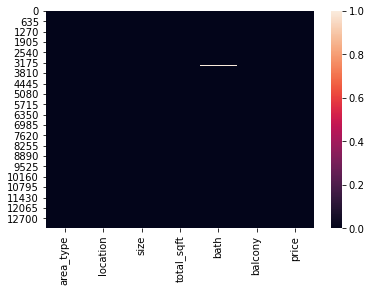

In [144]:
sns.heatmap(data.isnull())

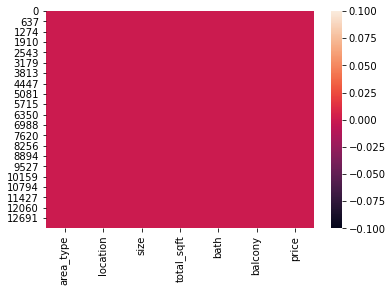

In [145]:
sns.heatmap(data2.isnull())

In [146]:
data2 = data2.reset_index(drop=True)

In [147]:
data2

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13242,Super built-up Area,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13243,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00
13244,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00


In [148]:
data3 = data2.join(pd.DataFrame({'size_new':improve_size(data2['size'])}))

In [149]:
data3

,area_type,location,size,total_sqft,bath,balcony,price,size_new
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00,5
13242,Super built-up Area,Richards Town,4 BHK,3600,5.0,1.584376,400.00,4
13243,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00,2
13244,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00,4


In [150]:
data3.isnull()

,area_type,location,size,total_sqft,bath,balcony,price,size_new
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
13241,False,False,False,False,False,False,False,False
13242,False,False,False,False,False,False,False,False
13243,False,False,False,False,False,False,False,False
13244,False,False,False,False,False,False,False,False


In [151]:
data3['size_new'].isnull().sum()

0

In [152]:
data2.shape

(13246, 7)

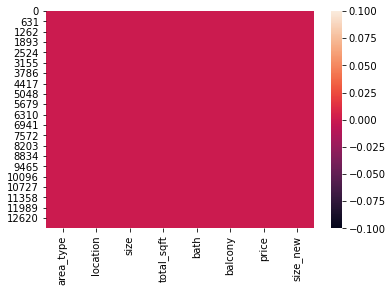

In [153]:
sns.heatmap(data3.isnull())

In [154]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13246 entries, 0 to 13245
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     13246 non-null  float64
 6   price       13246 non-null  float64
 7   size_new    13246 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 828.0+ KB


In [155]:
data3.describe()

,bath,balcony,price,size_new
count,13246.000000,13246.000000,13246.000000,13246.000000
mean,2.692586,1.584344,112.389392,2.801902
std,1.341506,0.800579,149.076587,1.295758
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [156]:
data3.drop('size',axis = 1,inplace = True)

In [157]:
data3

,area_type,location,total_sqft,bath,balcony,price,size_new
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.000000,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.000000,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.000000,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.000000,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.000000,51.00,2
...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,3453,4.0,0.000000,231.00,5
13242,Super built-up Area,Richards Town,3600,5.0,1.584376,400.00,4
13243,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.000000,60.00,2
13244,Super built-up Area,Padmanabhanagar,4689,4.0,1.000000,488.00,4


In [158]:
data3['total_sqft'].value_counts()

1200           843
1100           221
1500           204
2400           195
600            180
              ... 
956              1
3369 - 3464      1
2679             1
1734             1
4428             1
Name: total_sqft, Length: 2067, dtype: int64

In [159]:
new_sqft = []
for x in data3['total_sqft']:
    try:
        new_sqft.append(float(x))
    except:
        try:
            temp = x.split('-')
            new_sqft.append((float(temp[0])+float(temp[-1]))/2)
        except:
            new_sqft.append(np.nan)
data4 = data3.join(pd.DataFrame({'sqft':new_sqft}))

In [160]:
data4

,area_type,location,total_sqft,bath,balcony,price,size_new,sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.000000,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.000000,120.00,4,2600.0
2,Built-up Area,Uttarahalli,1440,2.0,3.000000,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.000000,95.00,3,1521.0
4,Super built-up Area,Kothanur,1200,2.0,1.000000,51.00,2,1200.0
...,...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,3453,4.0,0.000000,231.00,5,3453.0
13242,Super built-up Area,Richards Town,3600,5.0,1.584376,400.00,4,3600.0
13243,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.000000,60.00,2,1141.0
13244,Super built-up Area,Padmanabhanagar,4689,4.0,1.000000,488.00,4,4689.0


In [161]:
data4.drop('total_sqft',axis = 1,inplace = True)

In [162]:
data4

,area_type,location,bath,balcony,price,size_new,sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.000000,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.000000,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.000000,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.000000,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.000000,51.00,2,1200.0
...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,0.000000,231.00,5,3453.0
13242,Super built-up Area,Richards Town,5.0,1.584376,400.00,4,3600.0
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,1.000000,60.00,2,1141.0
13244,Super built-up Area,Padmanabhanagar,4.0,1.000000,488.00,4,4689.0


In [163]:
data4.describe()

,bath,balcony,price,size_new,sqft
count,13246.000000,13246.000000,13246.000000,13246.000000,13200.000000
mean,2.692586,1.584344,112.389392,2.801902,1555.302783
std,1.341506,0.800579,149.076587,1.295758,1237.323445
min,1.000000,0.000000,8.000000,1.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000,1100.000000
50%,2.000000,2.000000,72.000000,3.000000,1275.000000
75%,3.000000,2.000000,120.000000,3.000000,1672.000000
max,40.000000,3.000000,3600.000000,43.000000,52272.000000


In [164]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13246 entries, 0 to 13245
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_type  13246 non-null  object 
 1   location   13246 non-null  object 
 2   bath       13246 non-null  float64
 3   balcony    13246 non-null  float64
 4   price      13246 non-null  float64
 5   size_new   13246 non-null  int64  
 6   sqft       13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 724.5+ KB


In [165]:
data4.corr()

,bath,balcony,price,size_new,sqft
bath,1.000000,0.182798,0.456350,0.898408,0.392743
balcony,0.182798,1.000000,0.104213,0.170622,0.136725
price,0.456350,0.104213,1.000000,0.397222,0.574330
size_new,0.898408,0.170622,0.397222,1.000000,0.346013
sqft,0.392743,0.136725,0.574330,0.346013,1.000000


In [166]:
data4['location'].value_counts()

Whitefield                                         534
Sarjapur  Road                                     392
Electronic City                                    302
Kanakpura Road                                     266
Thanisandra                                        233
                                                  ... 
SK Garden                                            1
NR Colony                                            1
Chikka Gowdanapalya.                                 1
Park View Layout                                     1
12th cross srinivas nagar banshankari 3rd stage      1
Name: location, Length: 1304, dtype: int64

In [167]:
lookinto = data4.corr()
lookinto['price'].sort_values(ascending=False)

price       1.000000
sqft        0.574330
bath        0.456350
size_new    0.397222
balcony     0.104213
Name: price, dtype: float64

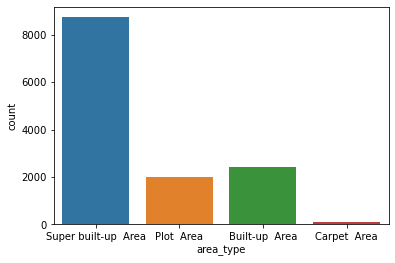

In [168]:
sns.countplot('area_type',data=data4)

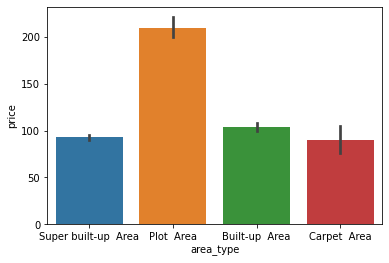

In [169]:
sns.barplot(x='area_type',y='price',data=data4)

In [170]:
data4['size_new'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: size_new, dtype: int64

In [171]:
def price_per_sq(arr1,arr2):
    temp = []
    n = len(arr1)
    for i in range(n):
        temp.append(arr1[1]/arr2[2])
    return temp

In [172]:
data5 = data4.join(pd.DataFrame({'price_per_sq':price_per_sq(data4['price'],data4['sqft'])}))

In [173]:
data5

,area_type,location,bath,balcony,price,size_new,sqft,price_per_sq
0,Super built-up Area,Electronic City Phase II,2.0,1.000000,39.07,2,1056.0,0.083333
1,Plot Area,Chikka Tirupathi,5.0,3.000000,120.00,4,2600.0,0.083333
2,Built-up Area,Uttarahalli,2.0,3.000000,62.00,3,1440.0,0.083333
3,Super built-up Area,Lingadheeranahalli,3.0,1.000000,95.00,3,1521.0,0.083333
4,Super built-up Area,Kothanur,2.0,1.000000,51.00,2,1200.0,0.083333
...,...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,0.000000,231.00,5,3453.0,0.083333
13242,Super built-up Area,Richards Town,5.0,1.584376,400.00,4,3600.0,0.083333
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,1.000000,60.00,2,1141.0,0.083333
13244,Super built-up Area,Padmanabhanagar,4.0,1.000000,488.00,4,4689.0,0.083333


In [174]:
data5.describe()

,bath,balcony,price,size_new,sqft,price_per_sq
count,13246.000000,13246.000000,13246.000000,13246.000000,13200.000000,1.324600e+04
mean,2.692586,1.584344,112.389392,2.801902,1555.302783,8.333333e-02
std,1.341506,0.800579,149.076587,1.295758,1237.323445,8.576797e-15
min,1.000000,0.000000,8.000000,1.000000,1.000000,8.333333e-02
25%,2.000000,1.000000,50.000000,2.000000,1100.000000,8.333333e-02
50%,2.000000,2.000000,72.000000,3.000000,1275.000000,8.333333e-02
75%,3.000000,2.000000,120.000000,3.000000,1672.000000,8.333333e-02
max,40.000000,3.000000,3600.000000,43.000000,52272.000000,8.333333e-02


In [175]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13246 entries, 0 to 13245
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   location      13246 non-null  object 
 2   bath          13246 non-null  float64
 3   balcony       13246 non-null  float64
 4   price         13246 non-null  float64
 5   size_new      13246 non-null  int64  
 6   sqft          13200 non-null  float64
 7   price_per_sq  13246 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 828.0+ KB


In [176]:
data4['area_type'].value_counts()

Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: area_type, dtype: int64

In [177]:
data5=data4

In [178]:
data6 = data5.join(pd.DataFrame({'price_per_sqft':(data5['price']*100000)/data5['sqft']}))

In [179]:
data6

,area_type,location,bath,balcony,price,size_new,sqft,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.000000,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.000000,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.000000,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.000000,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.000000,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,0.000000,231.00,5,3453.0,6689.834926
13242,Super built-up Area,Richards Town,5.0,1.584376,400.00,4,3600.0,11111.111111
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,1.000000,60.00,2,1141.0,5258.545136
13244,Super built-up Area,Padmanabhanagar,4.0,1.000000,488.00,4,4689.0,10407.336319


In [180]:
data6['location'].value_counts()

Whitefield                                         534
Sarjapur  Road                                     392
Electronic City                                    302
Kanakpura Road                                     266
Thanisandra                                        233
                                                  ... 
SK Garden                                            1
NR Colony                                            1
Chikka Gowdanapalya.                                 1
Park View Layout                                     1
12th cross srinivas nagar banshankari 3rd stage      1
Name: location, Length: 1304, dtype: int64

In [181]:
data6['location']=data6['location'].apply(lambda x:x.strip())

In [182]:
location_count = data6['location'].value_counts()

In [183]:
location_count_below10 = location_count[location_count<=10]

In [184]:
location_count_below10

Dairy Circle            10
Ganga Nagar             10
Dodsworth Layout        10
Naganathapura           10
Nagappa Reddy Layout    10
                        ..
Venkateswara Nagar       1
manyata tech park        1
Narayanappa Layout       1
Narasapura               1
3rd Phase Iti Layout     1
Name: location, Length: 1052, dtype: int64

In [185]:
data6['location'] = data6['location'].apply(lambda x: 'other' if x in location_count_below10 else x) 

In [186]:
data6['location'].value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
HAL 2nd Stage           11
Nehru Nagar             11
Narayanapura            11
Pattandur Agrahara      11
Banjara Layout          11
Name: location, Length: 242, dtype: int64

In [187]:
data7 = data6[((data6['sqft']/data6['size_new'])>=300)]

In [188]:
data7

,area_type,location,bath,balcony,price,size_new,sqft,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.000000,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.000000,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.000000,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.000000,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.000000,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,0.000000,231.00,5,3453.0,6689.834926
13242,Super built-up Area,other,5.0,1.584376,400.00,4,3600.0,11111.111111
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,1.000000,60.00,2,1141.0,5258.545136
13244,Super built-up Area,Padmanabhanagar,4.0,1.000000,488.00,4,4689.0,10407.336319


In [189]:
data7.describe()

,bath,balcony,price,size_new,sqft,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,2.562781,1.587498,111.187960,2.649004,1590.189927,6308.502826
std,1.080275,0.794352,152.203367,0.976046,1260.404795,4168.127339
min,1.000000,0.000000,9.000000,1.000000,300.000000,267.829813
25%,2.000000,1.000000,49.000000,2.000000,1115.000000,4210.526316
50%,2.000000,2.000000,70.000000,3.000000,1300.000000,5294.117647
75%,3.000000,2.000000,115.000000,3.000000,1700.000000,6916.666667
max,16.000000,3.000000,3600.000000,16.000000,52272.000000,176470.588235


In [190]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12456 entries, 0 to 13245
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12456 non-null  object 
 1   location        12456 non-null  object 
 2   bath            12456 non-null  float64
 3   balcony         12456 non-null  float64
 4   price           12456 non-null  float64
 5   size_new        12456 non-null  int64  
 6   sqft            12456 non-null  float64
 7   price_per_sqft  12456 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 875.8+ KB


In [191]:
data7

,area_type,location,bath,balcony,price,size_new,sqft,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.000000,39.07,2,1056.0,3699.810606
1,Plot Area,Chikka Tirupathi,5.0,3.000000,120.00,4,2600.0,4615.384615
2,Built-up Area,Uttarahalli,2.0,3.000000,62.00,3,1440.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3.0,1.000000,95.00,3,1521.0,6245.890861
4,Super built-up Area,Kothanur,2.0,1.000000,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,0.000000,231.00,5,3453.0,6689.834926
13242,Super built-up Area,other,5.0,1.584376,400.00,4,3600.0,11111.111111
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,1.000000,60.00,2,1141.0,5258.545136
13244,Super built-up Area,Padmanabhanagar,4.0,1.000000,488.00,4,4689.0,10407.336319


In [192]:
data7.drop('price_per_sqft',axis = 1,inplace = True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [193]:
data7

,area_type,location,bath,balcony,price,size_new,sqft
0,Super built-up Area,Electronic City Phase II,2.0,1.000000,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,3.000000,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3.000000,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,1.000000,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,1.000000,51.00,2,1200.0
...,...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,0.000000,231.00,5,3453.0
13242,Super built-up Area,other,5.0,1.584376,400.00,4,3600.0
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,1.000000,60.00,2,1141.0
13244,Super built-up Area,Padmanabhanagar,4.0,1.000000,488.00,4,4689.0


In [194]:
data7.corr()

,bath,balcony,price,size_new,sqft
bath,1.000000,0.221407,0.529346,0.869481,0.533818
balcony,0.221407,1.000000,0.103404,0.225827,0.141030
price,0.529346,0.103404,1.000000,0.479312,0.582676
size_new,0.869481,0.225827,0.479312,1.000000,0.517456
sqft,0.533818,0.141030,0.582676,0.517456,1.000000


In [195]:
data7.drop('balcony',axis = 1,inplace = True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [196]:
data7

,area_type,location,bath,price,size_new,sqft
0,Super built-up Area,Electronic City Phase II,2.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,231.00,5,3453.0
13242,Super built-up Area,other,5.0,400.00,4,3600.0
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0
13244,Super built-up Area,Padmanabhanagar,4.0,488.00,4,4689.0


In [197]:
#One Hot Encoding

In [198]:
ohe = OneHotEncoder(sparse=False)
ohe2=OneHotEncoder(sparse=False)

In [199]:
ohe.fit_transform([data7['location']])
ohe2.fit_transform([data7['area_type']])

array([[1., 1., 1., ..., 1., 1., 1.]])

In [200]:
ohe.categories_

[array(['Electronic City Phase II'], dtype=object),
 array(['Chikka Tirupathi'], dtype=object),
 array(['Uttarahalli'], dtype=object),
 array(['Lingadheeranahalli'], dtype=object),
 array(['Kothanur'], dtype=object),
 array(['Whitefield'], dtype=object),
 array(['Old Airport Road'], dtype=object),
 array(['Rajaji Nagar'], dtype=object),
 array(['Marathahalli'], dtype=object),
 array(['Whitefield'], dtype=object),
 array(['Whitefield'], dtype=object),
 array(['7th Phase JP Nagar'], dtype=object),
 array(['Gottigere'], dtype=object),
 array(['Sarjapur'], dtype=object),
 array(['Mysore Road'], dtype=object),
 array(['Bisuvanahalli'], dtype=object),
 array(['Raja Rajeshwari Nagar'], dtype=object),
 array(['other'], dtype=object),
 array(['other'], dtype=object),
 array(['Kengeri'], dtype=object),
 array(['Binny Pete'], dtype=object),
 array(['Thanisandra'], dtype=object),
 array(['Bellandur'], dtype=object),
 array(['Thanisandra'], dtype=object),
 array(['other'], dtype=object),
 array(['E

In [201]:
ohe2.categories_

[array(['Super built-up  Area'], dtype=object),
 array(['Plot  Area'], dtype=object),
 array(['Built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Plot  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Built-up  Area'], dtype=object),
 array(['Plot  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Built-up  Area'], dtype=object),
 array(['Super built-up  Area'], dtype=object),
 array(['Plot  Area'], dtype=object),
 a

In [202]:
data7

,area_type,location,bath,price,size_new,sqft
0,Super built-up Area,Electronic City Phase II,2.0,39.07,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,120.00,4,2600.0
2,Built-up Area,Uttarahalli,2.0,62.00,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,95.00,3,1521.0
4,Super built-up Area,Kothanur,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,231.00,5,3453.0
13242,Super built-up Area,other,5.0,400.00,4,3600.0
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,60.00,2,1141.0
13244,Super built-up Area,Padmanabhanagar,4.0,488.00,4,4689.0


In [203]:
y = data7['price']
x = data7.drop(columns=['price'])

In [204]:
x

,area_type,location,bath,size_new,sqft
0,Super built-up Area,Electronic City Phase II,2.0,2,1056.0
1,Plot Area,Chikka Tirupathi,5.0,4,2600.0
2,Built-up Area,Uttarahalli,2.0,3,1440.0
3,Super built-up Area,Lingadheeranahalli,3.0,3,1521.0
4,Super built-up Area,Kothanur,2.0,2,1200.0
...,...,...,...,...,...
13241,Built-up Area,Whitefield,4.0,5,3453.0
13242,Super built-up Area,other,5.0,4,3600.0
13243,Built-up Area,Raja Rajeshwari Nagar,2.0,2,1141.0
13244,Super built-up Area,Padmanabhanagar,4.0,4,4689.0


In [205]:
y

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13241    231.00
13242    400.00
13243     60.00
13244    488.00
13245     17.00
Name: price, Length: 12456, dtype: float64

In [206]:
x.drop('area_type',axis=1,inplace=True)

In [207]:
x.to_csv("locations")

In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [209]:
x_test

,location,bath,size_new,sqft
9521,Raja Rajeshwari Nagar,3.0,3,1757.0
7545,other,5.0,6,2400.0
4158,Kasavanhalli,2.0,2,1200.0
8144,other,1.0,2,840.0
2748,Sahakara Nagar,2.0,2,1150.0
...,...,...,...,...
11187,Yeshwanthpur,2.0,2,1162.0
202,Kadugodi,2.0,3,1260.0
5801,Padmanabhanagar,2.0,2,1200.0
11843,Sarjapur Road,2.0,2,1025.0


In [210]:
x_test.shape

(2492, 4)

In [211]:
x_train.shape

(9964, 4)

In [212]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [213]:
scaler = StandardScaler()

In [214]:

reg = LinearRegression()

In [215]:
pipe = make_pipeline(column_trans,scaler,reg)

In [216]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [217]:
predicted = pipe.predict(x_test)

In [218]:
predicted

array([105.1008795 , 264.42509825,  65.1633795 , ...,  94.43291075,
        53.21416075,  78.56572325])

In [219]:
from sklearn.metrics import r2_score

In [220]:
r2_score(y_test,predicted)

0.42580195040335367

In [221]:
lasso = Lasso()

In [222]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [223]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [224]:
predicted = pipe.predict(x_test)

In [225]:
r2_score(y_test,predicted)

0.429063327531635

In [226]:
ridge = Ridge()

In [227]:
pipe = make_pipeline(column_trans,scaler,ridge)

In [228]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [229]:
predicted = pipe.predict(x_test)

In [230]:
r2_score(y_test,predicted)

0.4258697626120119

In [231]:
model = RandomForestRegressor()

In [232]:
pipe = make_pipeline(column_trans,scaler,model)

In [233]:
x_train

,location,bath,size_new,sqft
720,Raja Rajeshwari Nagar,4.0,4,1200.0
12480,Brookefield,4.0,4,3050.0
8607,Kogilu,1.0,1,700.0
5973,Thanisandra,1.0,1,693.0
1309,Thanisandra,2.0,3,1430.0
...,...,...,...,...
5174,other,2.0,2,1036.0
3475,other,3.0,3,1340.0
10483,Kadubeesanahalli,2.0,2,1185.0
11483,Gubbalala,5.0,4,4000.0


In [ ]:
pipe.fit(x_train,y_train)

In [ ]:
x_test

In [ ]:
predicted=pipe.predict(x_test)

In [ ]:
r2_score(y_test,predicted)

In [ ]:
from joblib import dump, load

In [ ]:
dump(pipe,'pipe.joblib') 